In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = pd.read_sql("SELECT date FROM Measurement ORDER BY date DESC", conn).head(1)
recent = most_recent_date['date'][0]
print(f"The most recent date in the dataset is {recent}.")

The most recent date in the dataset is 2017-08-23.


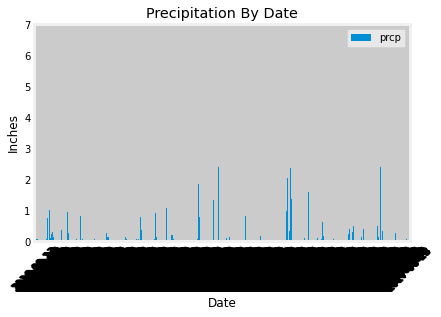

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
one_year_before = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
last_12_months = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_before).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
last_12_months_df = pd.DataFrame(last_12_months)
last_12_months_df = last_12_months_df.set_index('date')

# Sort the dataframe by date
last_12_months_df = last_12_months_df.sort_values('date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
last_12_months_df.plot.bar()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation By Date')
plt.xticks(rotation=45)
plt.show()


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_12_months_df.describe(include='all')

prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
station_query = session.query(Station).group_by(Station.station).count()
print(f"There are {station_query} stations in the dataset.")

There are 9 stations in the dataset.


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_query = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_query

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# Using the most active station id from the previous query:
# calculate the lowest, highest, and average temperature.
most_active_query = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(f"The most active station is {most_active_query[0]}.")
print(f"The highest temperature is {highest_temp[0][0]}, the lowest temperature is {lowest_temp[0][0]}, and the average temperature is {average_temp[0][0]}.")

The most active station is USC00519281.
The highest temperature is 85.0, the lowest temperature is 54.0, and the average temperature is 71.66378066378067.


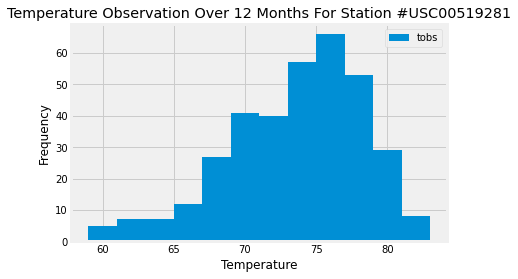

In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
# and plot the results as a histogram

histo = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= one_year_before).all()

histo_df = pd.DataFrame(histo, columns=['tobs'])
histo_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.title("Temperature Observation Over 12 Months For Station #USC00519281")
plt.show()

# Close session

In [45]:
# Close Session
session.close()